In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

### Load Dataset


In [12]:
# Load the training data
train_path = "train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [13]:
print(train_data.describe())

                                 Title    Genre  \
count                            54214    54214   
unique                           54214       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1    13613   

                                              Description  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12  


In [14]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


In [15]:
print(train_data.isnull().sum())

Title          0
Genre          0
Description    0
dtype: int64


In [16]:
# Load the test data
test_path = "test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
test_data.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


#### Exploratory Data Analysis & Visualization

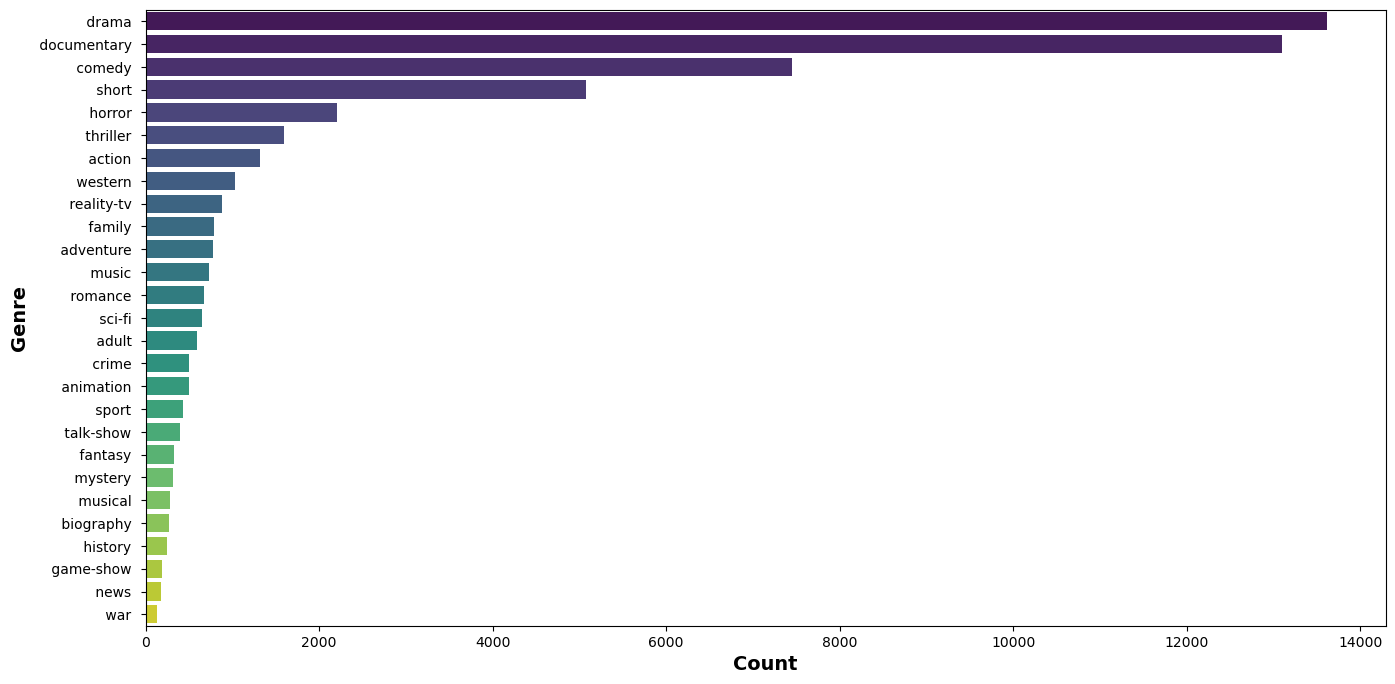

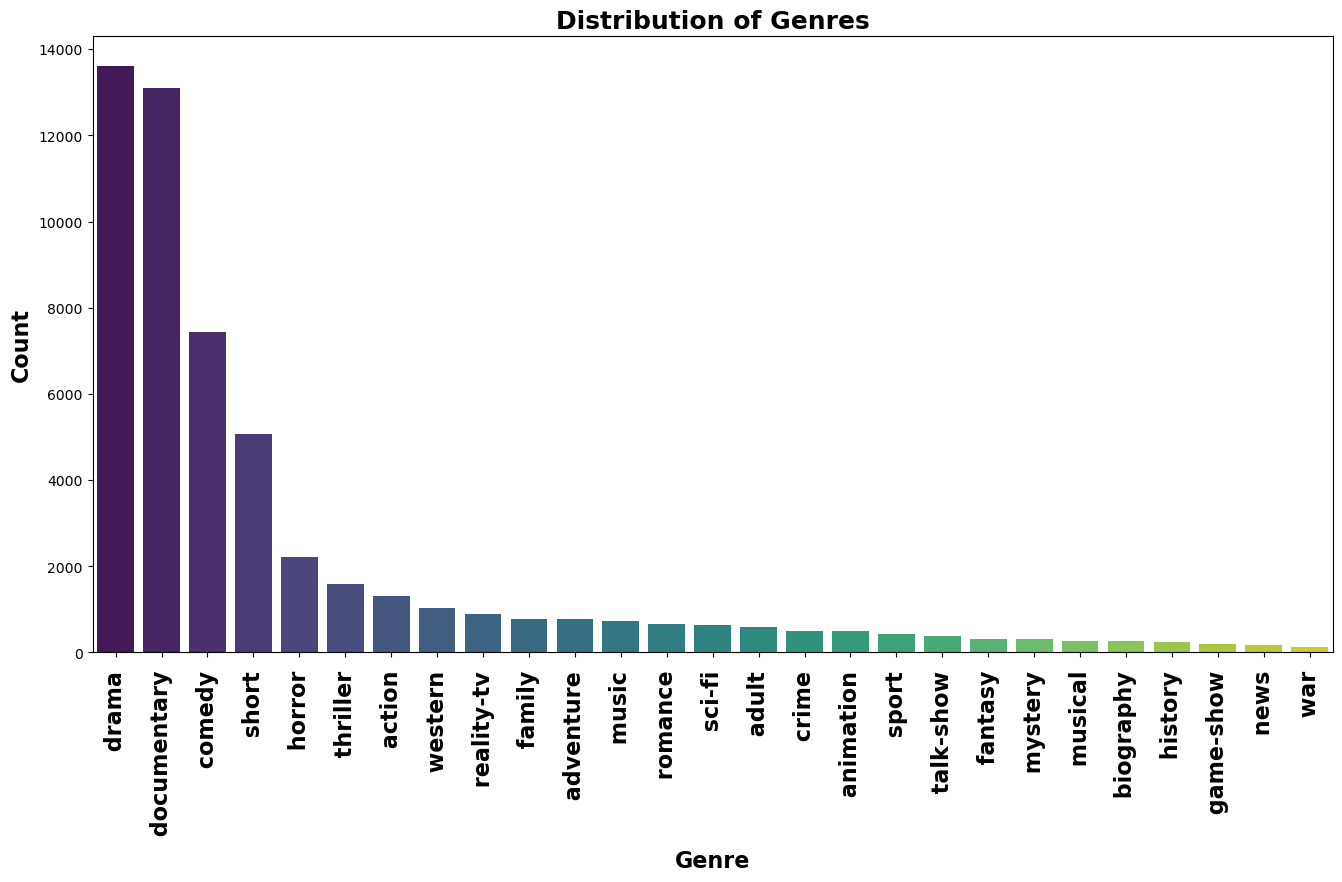

In [17]:
# Plot the distribution of genres in the training data
plt.figure(figsize=(16, 8))
sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')

# Plot the distribution of genres using a bar plot
plt.figure(figsize=(16, 8))
counts = train_data['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('Genre', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.title('Distribution of Genres', fontsize=18, fontweight='bold')
plt.xticks(rotation=90, fontsize=16, fontweight='bold')
plt.show()

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

### Data Preprocessing and Text Cleaning

In [37]:
# Function to clean and preprocess text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and stem tokens
    stop_words = set(stopwords.words('english'))
    stemmer = LancasterStemmer()
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    # Join tokens back into text
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

In [38]:
train_data['Cleaned_Description'] = train_data['Description'].apply(clean_text)
test_data['Cleaned_Description'] = test_data['Description'].apply(clean_text)

### TF-IDF Vectorization

In [39]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Cleaned_Description'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['Cleaned_Description'])

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, train_data['Genre'], test_size=0.2, random_state=42)

###  Classification using Naive Bayes

In [41]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_preds = nb_classifier.predict(X_val)
nb_accuracy = accuracy_score(y_val, nb_preds)
print("Naive Bayes Validation Accuracy:", nb_accuracy)
print(classification_report(y_val, nb_preds))

Naive Bayes Validation Accuracy: 0.5106520335700452


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.80      0.05      0.09       263
       adult        0.78      0.06      0.12       112
   adventure        0.40      0.06      0.10       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.40      0.45      1443
       crime        0.00      0.00      0.00       107
 documentary        0.56      0.88      0.69      2659
       drama        0.44      0.83      0.58      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.03      0.05        40
     history        0.00      0.00      0.00        45
      horror        0.77      0.30      0.44       431
       music        0.79      0.08      0.14       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Classification using Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, y_train)
lr_preds = lr_classifier.predict(X_val)
lr_accuracy = accuracy_score(y_val, lr_preds)
print("Logistic Regression Validation Accuracy:", lr_accuracy)
print(classification_report(y_val, lr_preds))

Logistic Regression Validation Accuracy: 0.5779765747486858
               precision    recall  f1-score   support

      action        0.53      0.28      0.36       263
       adult        0.84      0.32      0.46       112
   adventure        0.37      0.14      0.20       139
   animation        0.45      0.09      0.15       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.58      0.54      1443
       crime        0.29      0.02      0.04       107
 documentary        0.67      0.83      0.74      2659
       drama        0.54      0.76      0.63      2697
      family        0.47      0.10      0.16       150
     fantasy        0.67      0.03      0.05        74
   game-show        0.94      0.42      0.59        40
     history        0.00      0.00      0.00        45
      horror        0.65      0.60      0.63       431
       music        0.62      0.49      0.54       144
     musical        0.50      0.02      0.04        50
    

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
